In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def generate_sample(n, rho):
    sample = np.random.multivariate_normal(mean=[0, 0], cov=[[1, rho],[rho, 1]],size=n)
    return sample

In [3]:
def count_mm_statistic(sample):
    rho = np.mean(sample[:, 0] * sample[:, 1])
    return rho

In [4]:
def solve(f, a, b, eps=10**(-5)):
    c = (b + a) / 2
    while abs(f(c)) > eps:
        if f(c) > 0:
            a = c
        else:
            b = c
        c = (a + b) / 2
    
    return c

In [5]:
def count_ml_statistic(sample):
    s = np.sum(sample[:, 0] ** 2 + sample[:, 1] ** 2)
    prod = np.sum(sample[:, 0] * sample[:, 1])
    n = sample.shape[0]
    
    eq = lambda p: n*(1 - p ** 2) - s + prod * (p ** 2 + 1) / p 
    rho = solve(eq, 0, 1)
    return rho

In [6]:
def compare_estimations(rho, n_range):
    ns = [i for i in range(n_range[0], n_range[1], 10)]
    d = []
    for n in ns:
        sample = generate_sample(n, rho)
        d.append(count_mm_statistic(sample) / count_ml_statistic(sample))
        
    plt.plot(ns, d)
    plt.title("Отношение оценки по методу моментов к \n"
              "оценке по методу максимального правдоподобия при p = {}".format(rho))
    plt.xlabel("Размер выборки")
    plt.show()

# (a)
Для двумерного нормального распределения, где каждая компонента вектора имеет стандартное нормальное распределение и $cov(x,y) = \rho \in \{0.3, 0.5, 0.9\}$ были сгенерированы случайные выборки размером от $20$ до $500$ с шагом $10$. Для каждой выборки было подсчитано отношение оценки для $\rho$ по методу моментов к оценке по методу максимального правдоподобия. Из графиков видно, что это отношение не равно 1 (хоть в пределе и стремится к ней), а значит, эти оценки не совпадают.

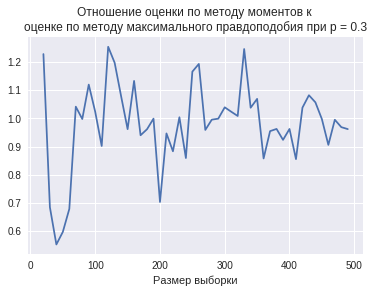

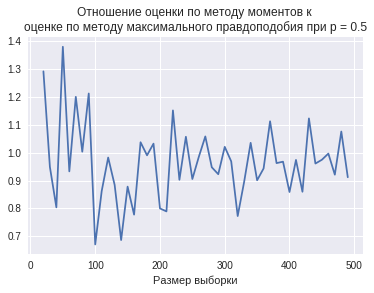

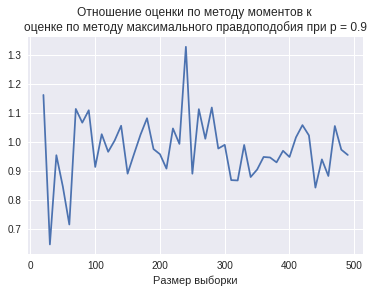

In [7]:
compare_estimations(0.3, [20, 500])
compare_estimations(0.5, [20, 500])
compare_estimations(0.9, [20, 500])

In [8]:
def variance_estimation(n, rho, k=100):
    est = []
    for _ in range(k):
        s = generate_sample(n, rho)
        est.append(count_ml_statistic(s))
    return np.mean((np.asarray(est) - rho) ** 2)

In [9]:
def show_variance(rho, nlim=500):
    var_diff = []
    rk_const = (rho ** 2 - 1) ** 2 / (rho ** 2 + 1)
    for n in range(20,nlim,10):
        var_diff.append(variance_estimation(n, rho) - rk_const / n)
        
    plt.title("Разность дисперсии параметра p \nи ее нижней оценки по неравенству Рао-Крамера")
    plt.plot([n for n in range(20, nlim, 10)], var_diff)
    plt.xlabel("Размер выборки")
    plt.show()

# (b)
Для оценки дисперсии $\widehat{\rho}_n$ для каждого $n$ от $20$ до $500$ с шагом $10$ было сгенерировано $100$ случайных выборок. Для каждой выборки была вычислена оценка $\widehat{\rho}_n^k$ для $\rho$ по методу максимального правдоподобия. Для $\widehat{\rho}_n^1 \dots \widehat{\rho}_n^{100}$ была подсчитана выборочная дисперсия. Эта выборочная дисперсия сравнивалась с нижней оценкой дисперсии по неравенству Рао-Крамера. Ниже изображен график разности выборочной дисперсии и ее нижней оценки. Как видно, с ростом размера выборки эта разность стремится к 0, из чего следует, что нижняя граница дисперсии достигается в пределе.

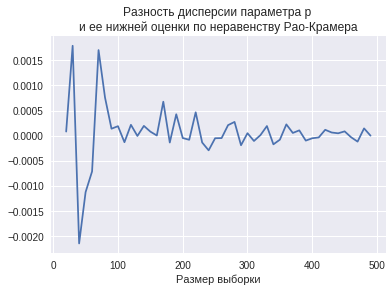

In [10]:
show_variance(0.6)